![Futuristic electric car charging](ev_charging.png)

The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, understanding trends in charging facilities and sales is essential to inform strategic planning.

As a data scientist working for a leading EV charging network operator, you recognize the potential in this data and start wrangling and visualizing the aggregated yearly data. 

This yearly data captured in December of each year encompasses a record of EV charging port installations and station localities spanning roughly ten years, capturing both public and private charging environments. 
___

### The Data
&nbsp;

`private_ev_charging.csv`

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection |
| `private_ports`| The number of available charging ports owned by private companies in a given year  |
| `private_station_locations`   | The number of privately owned station locations for EV charging

___

`public_ev_charging.csv`
 
| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection  |
| `public_ports`| The number of available charging ports under public ownership in a given year  |
| `public_station_locations`   | The number of publicly owned station locations for EV charging

___

The sales information is available for each model and year in the `ev_sales.csv` file:

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `Vehicle` |  Electric vehicle model |
| `year`| Year of data collection |
| `sales`   | The number of vehicles sold in the US

In [64]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [65]:
# Start coding here
# Loading the data
private_ev_charging = pd.read_csv('private_ev_charging.csv')
public_ev_charging = pd.read_csv('public_ev_charging.csv')
ev_sales = pd.read_csv('ev_sales.csv')

In [66]:
private_ev_charging.head(10)

,year,private_ports,private_station_locations
0,2014,3695,1825
1,2015,4150,1962
2,2016,5763,2331
3,2017,6048,2370
4,2018,6812,2489
5,2019,9955,3078
6,2020,10647,2768
7,2021,18867,4074
8,2022,19993,4435


In [67]:
public_ev_charging.head(10)

,year,public_ports,public_station_locations
0,2013,16619,6938
1,2014,22470,9207
2,2015,26532,10710
3,2016,33165,13150
4,2017,45789,16170
5,2018,56842,19893
6,2019,73838,23282
7,2020,96190,28602
8,2021,114451,46407
9,2022,136513,53764


In [68]:
ev_sales.head()

,Vehicle,year,sales
0,Chevy Volt,2011,7671.0
1,Chevy Volt,2012,23461.0
2,Chevy Volt,2013,23094.0
3,Chevy Volt,2014,18805.0
4,Chevy Volt,2015,15393.0


In [69]:
private_ev_charging.dtypes

year                         int64
private_ports                int64
private_station_locations    int64
dtype: object

In [70]:
public_ev_charging.dtypes

year                        int64
public_ports                int64
public_station_locations    int64
dtype: object

In [71]:
ev_sales.isna().sum()

Vehicle      0
year         0
sales      254
dtype: int64

In [72]:
ev_sales.value_counts

<bound method DataFrame.value_counts of          Vehicle  year    sales
0     Chevy Volt  2011   7671.0
1     Chevy Volt  2012  23461.0
2     Chevy Volt  2013  23094.0
3     Chevy Volt  2014  18805.0
4     Chevy Volt  2015  15393.0
..           ...   ...      ...
490  Kia Niro EV  2015      NaN
491  Kia Niro EV  2016      NaN
492  Kia Niro EV  2017      NaN
493  Kia Niro EV  2018      NaN
494  Kia Niro EV  2019   1562.0

[495 rows x 3 columns]>

In [73]:
ev_sales_mean = ev_sales.groupby('year')['sales'].mean()

In [74]:
ev_sales_mean

year
2011    4440.750000
2012    4833.727273
2013    6068.875000
2014    5403.727273
2015    4223.074074
2016    5320.533333
2017    4770.268293
2018    8029.222222
2019    7258.755556
Name: sales, dtype: float64

In [75]:
np.std(ev_sales['sales'])

14734.032428474804

In [76]:
np.mean(ev_sales['sales'])

5992.103734439834

In [77]:
# Join the public and private DataFrames
df_comblined = private_ev_charging.merge(public_ev_charging, on='year', how='outer', indicator=True)

In [78]:
df_comblined

,year,private_ports,private_station_locations,public_ports,public_station_locations,_merge
0,2014,3695.0,1825.0,22470,9207,both
1,2015,4150.0,1962.0,26532,10710,both
2,2016,5763.0,2331.0,33165,13150,both
3,2017,6048.0,2370.0,45789,16170,both
4,2018,6812.0,2489.0,56842,19893,both
5,2019,9955.0,3078.0,73838,23282,both
6,2020,10647.0,2768.0,96190,28602,both
7,2021,18867.0,4074.0,114451,46407,both
8,2022,19993.0,4435.0,136513,53764,both
9,2013,NaN,NaN,16619,6938,right_only


In [79]:
# Filter out missing data
df_temp = df_comblined[df_comblined['_merge']=='both']

In [80]:
df_temp

,year,private_ports,private_station_locations,public_ports,public_station_locations,_merge
0,2014,3695.0,1825.0,22470,9207,both
1,2015,4150.0,1962.0,26532,10710,both
2,2016,5763.0,2331.0,33165,13150,both
3,2017,6048.0,2370.0,45789,16170,both
4,2018,6812.0,2489.0,56842,19893,both
5,2019,9955.0,3078.0,73838,23282,both
6,2020,10647.0,2768.0,96190,28602,both
7,2021,18867.0,4074.0,114451,46407,both
8,2022,19993.0,4435.0,136513,53764,both


In [81]:
# Remove irrelevant columns
df_temp = df_temp.drop(columns=['_merge'])

In [82]:
df_temp

,year,private_ports,private_station_locations,public_ports,public_station_locations
0,2014,3695.0,1825.0,22470,9207
1,2015,4150.0,1962.0,26532,10710
2,2016,5763.0,2331.0,33165,13150
3,2017,6048.0,2370.0,45789,16170
4,2018,6812.0,2489.0,56842,19893
5,2019,9955.0,3078.0,73838,23282
6,2020,10647.0,2768.0,96190,28602
7,2021,18867.0,4074.0,114451,46407
8,2022,19993.0,4435.0,136513,53764


In [83]:
# Join with aggregated sales DataFrame
# Group by year and add sales
ev_total_sales = ev_sales.groupby('year')['sales'].sum().reset_index()

In [84]:
# Inspect the data
ev_total_sales.head(15)

,year,sales
0,2011,17763.0
1,2012,53171.0
2,2013,97102.0
3,2014,118882.0
4,2015,114023.0
5,2016,159616.0
6,2017,195581.0
7,2018,361315.0
8,2019,326644.0


In [85]:
# save the variable
ev_sales_2018 =361315

In [86]:
# Performing a left join
df_complete = df_temp.merge(ev_total_sales, how='left', on='year')

In [87]:
df_complete

,year,private_ports,private_station_locations,public_ports,public_station_locations,sales
0,2014,3695.0,1825.0,22470,9207,118882.0
1,2015,4150.0,1962.0,26532,10710,114023.0
2,2016,5763.0,2331.0,33165,13150,159616.0
3,2017,6048.0,2370.0,45789,16170,195581.0
4,2018,6812.0,2489.0,56842,19893,361315.0
5,2019,9955.0,3078.0,73838,23282,326644.0
6,2020,10647.0,2768.0,96190,28602,NaN
7,2021,18867.0,4074.0,114451,46407,NaN
8,2022,19993.0,4435.0,136513,53764,NaN


In [88]:
df_complete.isna().sum()

year                         0
private_ports                0
private_station_locations    0
public_ports                 0
public_station_locations     0
sales                        3
dtype: int64

In [89]:
# Drop any rows with null values
df_complete = df_complete.dropna(subset='sales')

In [90]:
df_complete

,year,private_ports,private_station_locations,public_ports,public_station_locations,sales
0,2014,3695.0,1825.0,22470,9207,118882.0
1,2015,4150.0,1962.0,26532,10710,114023.0
2,2016,5763.0,2331.0,33165,13150,159616.0
3,2017,6048.0,2370.0,45789,16170,195581.0
4,2018,6812.0,2489.0,56842,19893,361315.0
5,2019,9955.0,3078.0,73838,23282,326644.0


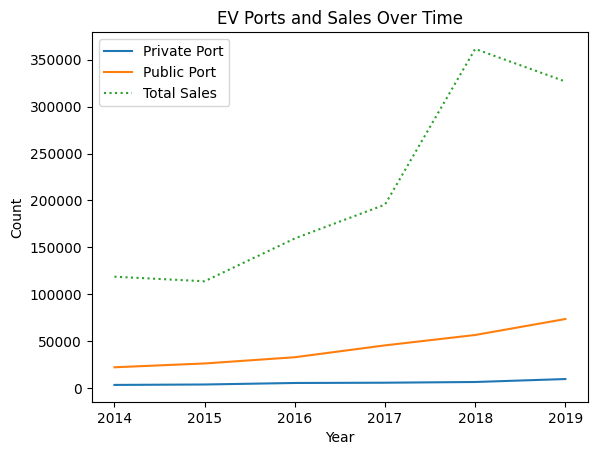

In [91]:
# Create a graph with multiple lines
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot each line
sns.lineplot(data=df_complete, x='year', y='private_ports', label='Private Port')
sns.lineplot(data=df_complete, x='year', y='public_ports', label='Public Port')
sns.lineplot(data=df_complete, x='year', y='sales', label='Total Sales', linestyle=':')

# Adding titles and labels
ax.set_title('EV Ports and Sales Over Time')
ax.set(xlabel='Year', ylabel='Count')

# Show the legend
ax.legend(loc='upper left')

# Show the plot
plt.show()

In [92]:
trend = 'same'